<a href="https://colab.research.google.com/github/giannisakritidis/PRML-Assignment/blob/main/Team37_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
#Since scipy doesn't include a maximize function and we want to maximize the log-likelihood func we will minimize the negative log-likelihood
from scipy.optimize import minimize

# Part A: Maximum Likelihood Estimation
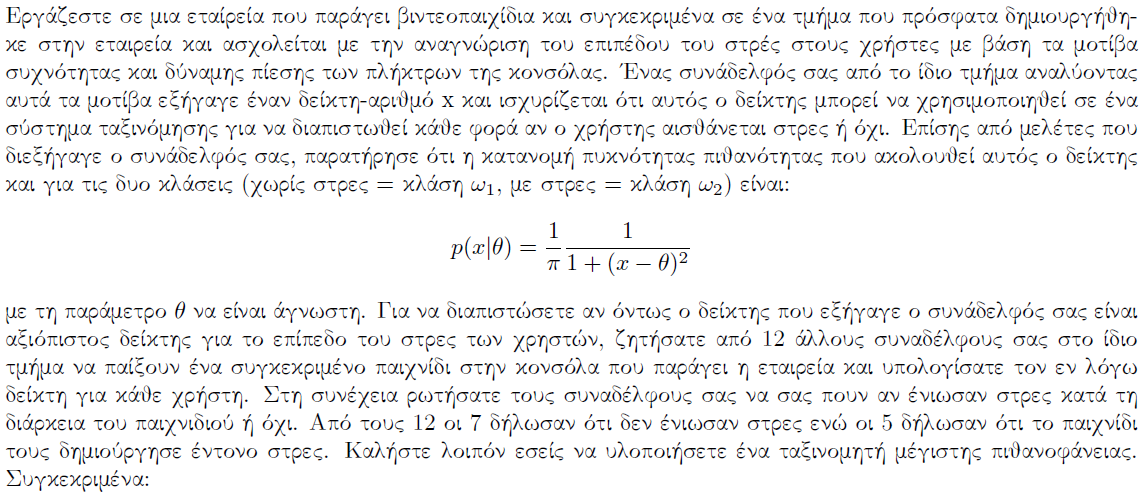

## The Classifier we will use for this task:

In [ ]:
class ML_Classifier:
  # Define the constructor
  def __init__(self):
      # Define the array that will hold the maximum likelihood estimates
      # of all parameters that maximize the likelihood of some dataset D
      self.theta_ml = []

  # We define the function for log_likelihood
  # Arguments are the dataset samples (data) and the parameter (theta) for which we estimate the likelihood of that dataset
  @staticmethod
  def log_likelihood(theta, data):
      # After simplifying the log-likelihood expression we get
      # log(p(x|θ)) = -N*log*(π) - sum(n=1:N)(log[1+(xn-θ)^2]) where xn are the samples of the dataset
      # and N is the number of samples in the dataset
      return -len(data) * np.log(np.pi) - np.sum(np.log(1 + (data - theta) ** 2))

  # We also define the gradient of the log_likelihood function with respect to the parameter θ
  # Arguments are the dataset samples (data) and the parameter (theta) for which we estimate the likelihood of that dataset
  @staticmethod
  def log_likelihood_grad(theta, data):
      # After simplifying the gradient of log-likelihood expression with respect to θ we get
      # grad_θ(log(p(x|θ))) = sum(n=1:N)[ (2*xn - 2*theta) / ((xn-theta)^2 + 1) ] where xn are the samples of the dataset
      # and N is the number of samples in the dataset
      return np.sum(2 * (data - theta) / (1 + (data - theta) ** 2))

  # Define a function that will plot the log-likelihood of a dataset for different parameter theta values
  # The function can be called with the optional argument theta_ml to also show the theta value that maximizes log_likelihood
  @staticmethod
  def plot_log_likelihood(theta_values, dataset, dataset_name, theta_ml=None):
      # Calculate log_likelihood for the specified range of θ values to plot the log-likelihood function
      log_likelihood_values = [ML_Classifier.log_likelihood(theta, dataset) for theta in theta_values]
      # Plotting the log-likelihood function
      plt.figure(figsize=(10, 6))
      plt.plot(theta_values, log_likelihood_values, label='Log-Likelihood Function')

      # If the maximum_likelihood theta is provided
      if theta_ml is not None:
          # Show the θ value that maximizes log_likelihood with a dashed vertical line
          plt.axvline(theta_ml, color='r', linestyle='--', label=f'θ{dataset_name}_ML={theta_ml:.3f}')
          # Show the maximum log_likelihood value for that θ
          plt.scatter([theta_ml], [ML_Classifier.log_likelihood(theta_ml, dataset)], color='red')

      plt.title(f'Log-Likelihood Function for different θ values (Dataset D{dataset_name})')
      plt.xlabel('θ parameter')
      plt.ylabel('Log-Likelihood Values')
      plt.legend()
      plt.grid(True)
      plt.show()

  def fit(self, dataset, initial_guess):
      # We want to get the maximum of the log_likelihood function for given dataset
      # To do that we apply the minimize method on the -log_likelihood function

      # A note needs to be made about the argument initial_guess
      # The minimize function uses methods that converge to a local minimum. So the initial
      # guess plays a crucial role if we want to converge to the global minimum. For that reason
      # we first make a plot of the log_likelihood function plot_likelihood to get an intuitive image
      # of it and then we call fit with the initial_guess argument equal to a number close the the
      # point of global maximum so the minimize method can converge correctly on the global minimum

      max_likelihood = minimize(
          # fun and jac functions need
          fun=lambda theta: -ML_Classifier.log_likelihood(theta, dataset),
          jac=lambda theta: -ML_Classifier.log_likelihood_grad(theta, dataset),
          x0=[initial_guess],  # Initial guess for optimal θ
          bounds=[(None, None)]  # No bounds on θ
      )
      # Extract the estimation for θ that maximizes log_likelihood and append it
      # to the Classifier's theta_ml array
      theta_ml_result = max_likelihood.x[0]
      self.theta_ml.append(theta_ml_result)

  # The predict function will receive as arguments a dataset, the apriori probabilities of each class
  # and the theta values that maximize log likelihood (through self.theta_ml), and will return the values
  # of the discriminant function of that dataset
  def predict(self, dataset, apriori_probs):
      # Compute log P(x | θ1) and log P(x | θ2) for each sample xn in the dataset
      log_likelihood_1 = -np.log(np.pi) - np.log(1 + (dataset - self.theta_ml[0]) ** 2)
      log_likelihood_2 = -np.log(np.pi) - np.log(1 + (dataset - self.theta_ml[1]) ** 2)

      # Compute g(xn) values for the n samples in the dataset
      g_values = log_likelihood_1 - log_likelihood_2 + np.log(P_w1) - np.log(P_w2)
      return g_values



## Task 1: Estimate parameters using the Maximum Likelihood Method
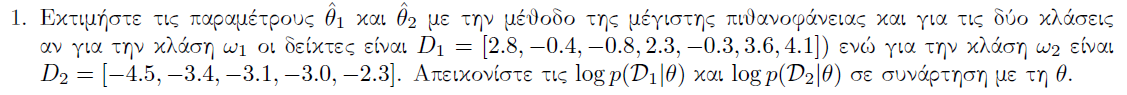

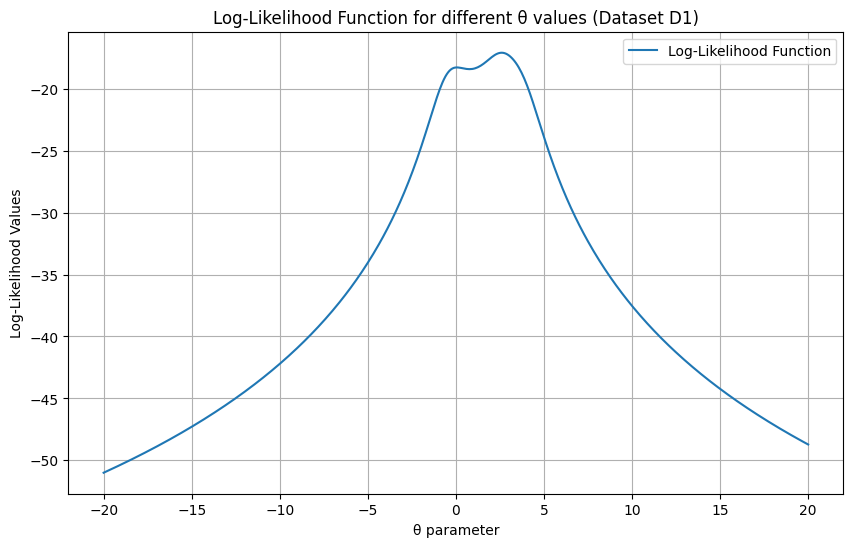

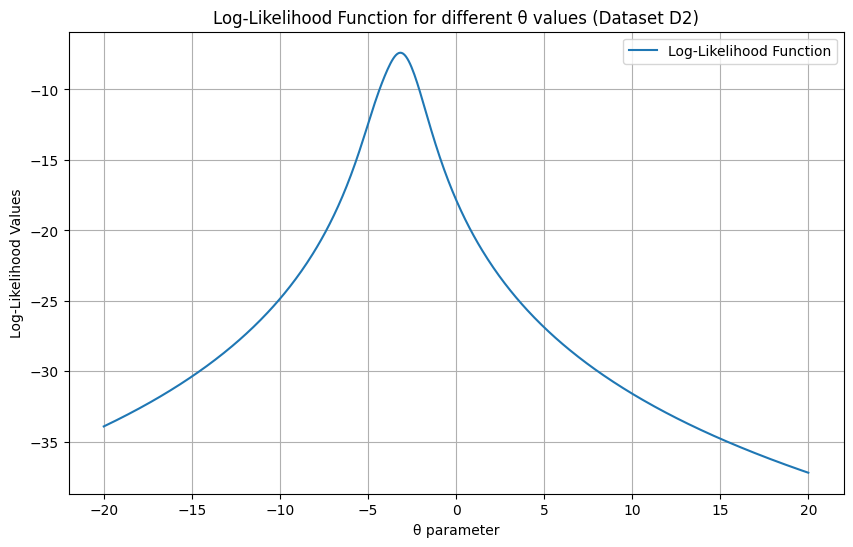

In [ ]:
# We have 2 datasets, each one having some values of x that correspond to each class
# First define the datasets

# Dataset D1, for class ω1
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])

# Dataset D2, for class ω2
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Our goal is to find the values of θ1, θ2 that maximize the log_likelihood log(p(D|θ))=log(product(n=1:N)(p(xn|θ)))
# for each dataset D1 and D2

# Initialize the classifier object
ml_classifier = ML_Classifier()

# First define the range of theta values we will examine to find the theta_ml
theta_values = np.linspace(-20, 20, 500)

# Plot the log-likelihood for D1, D2
ML_Classifier.plot_log_likelihood(theta_values, D1, "1")
ML_Classifier.plot_log_likelihood(theta_values, D2, "2")


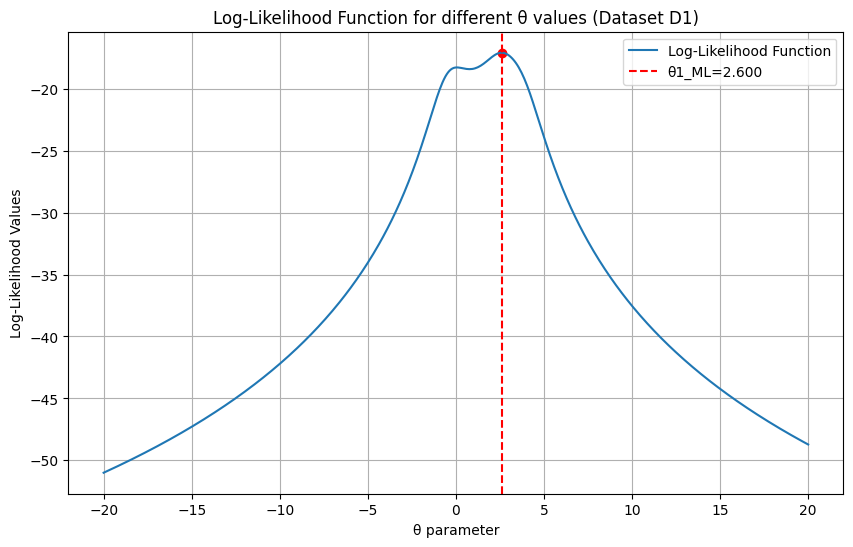

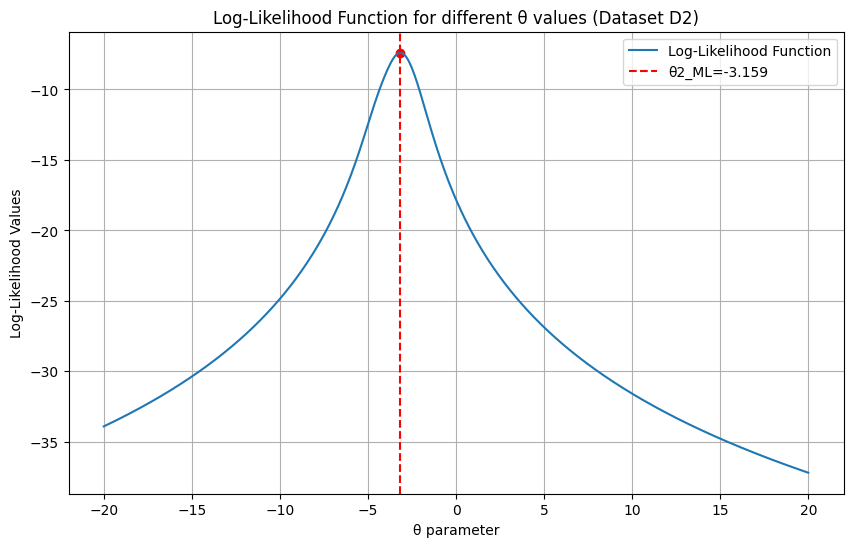

In [ ]:
# We can see from the plot that for D1 the log-likelihood is maximized for a value of theta ~2.5
# So we fit the classifier for D1 with initial_guess for theta_ml = 2.5
ml_classifier.fit(D1, 2.5)
# For D2 the theta that maximizes log-likelihood is ~ -3 so we fit the classifier for D2
# wit initial_guess for theta_ml = -3
ml_classifier.fit(D2, -3)

# Now plot again the log-likelihood function with the line that shows the theta_ml that maximizes it
ML_Classifier.plot_log_likelihood(theta_values, D1, "1", theta_ml=ml_classifier.theta_ml[0])
ML_Classifier.plot_log_likelihood(theta_values, D2, "2", theta_ml=ml_classifier.theta_ml[1])

## Task 2: Classify the samples of D1, D2 using discrimination function g(x)
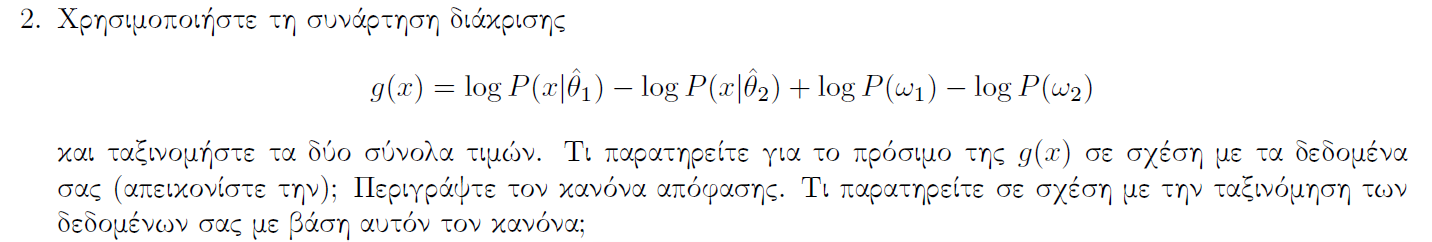

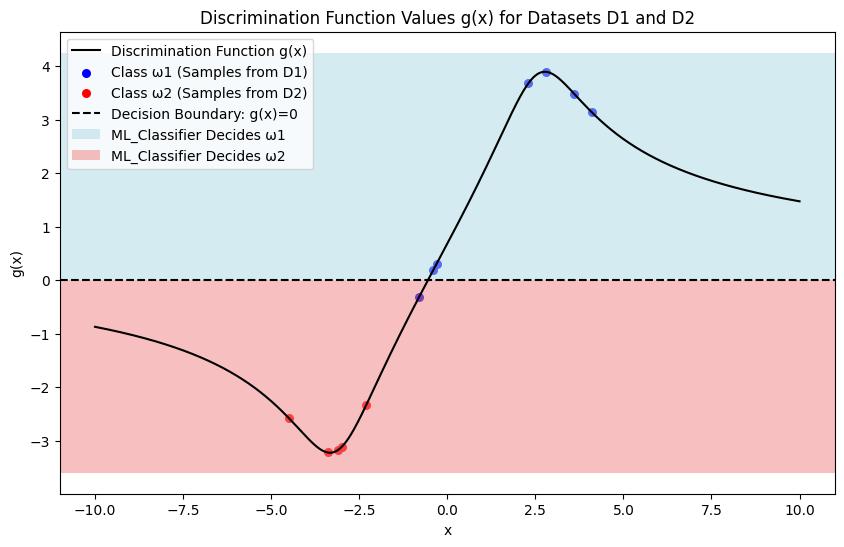

In [ ]:
# Define the a-priori probabilities for each class. These are the percentages of the samples
# of each dataset to the number of all samples for every dataset (frequency definition of probability)
P_w1 = len(D1) / (len(D1) + len(D2)) # a-priori probability of class ω1
P_w2 = len(D2) / (len(D1) + len(D2)) # a-priori probability of class ω2
apriori_probs = np.array([P_w1, P_w2]) # Make an array with the a-prioris to pass to the predict method

# Define a range of x_values over which the g(x) will be plotted
x_values = np.linspace(-10, 10, 1000)
g_values = ml_classifier.predict(x_values, apriori_probs)

# Find the g_values for D1
g_D1 = ml_classifier.predict(D1, apriori_probs)
# Find the g_values for D2
g_D2 = ml_classifier.predict(D2, apriori_probs)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x_values, g_values, color='black', label='Discrimination Function g(x)')
plt.scatter(D1, g_D1, color='blue', label='Class ω1 (Samples from D1)', s=30)
plt.scatter(D2, g_D2, color='red', label='Class ω2 (Samples from D2)', s=30)

# Make a horizontal dashed line to signify the decision boundary
plt.axhline(0, color='black', linestyle='--', label='Decision Boundary: g(x)=0')
# Shade the positive y-region (y > 0) with light blue
plt.axhspan(0, plt.ylim()[1], facecolor='lightblue', alpha=0.5, label='ML_Classifier Decides ω1')

# Shade the negative y-region (y < 0) with light red
plt.axhspan(plt.ylim()[0], 0, facecolor='lightcoral', alpha=0.5, label='ML_Classifier Decides ω2')

plt.title('Discrimination Function Values g(x) for Datasets D1 and D2')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(False)
plt.show()

# Part B: Bayesian Estimation
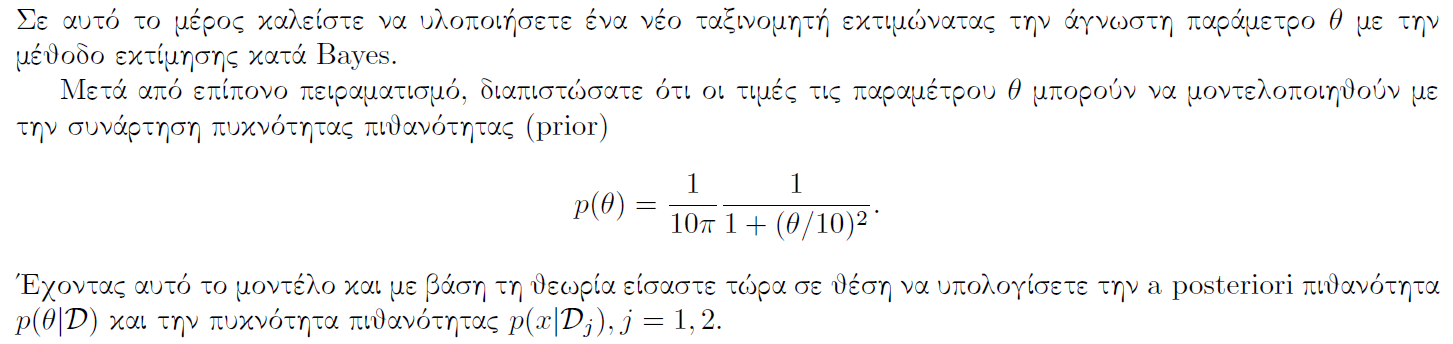

In [ ]:
#importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

##The Classifier we will use for this task:

In [ ]:
class BE_Classifier:
    # The class will be initialized with a range of theta values over which we will
    # calculate prior,likelihood and posterior distributions given a specific dataset
    def __init__(self, theta_values, x_values, dataset, dataset_name):
        self.prior_values = None
        self.likelihood_values = None
        self.posterior_values = None
        self.class_conditional_density_values = None
        self.theta_values = theta_values
        self.x_values = x_values
        self.data = dataset
        self.dataset_name = dataset_name

    # Define a function for the prior PDF of theta before observing data: p(θ)
    def prior(theta):
        return (1 / (10 * np.pi)) * (1 / (1 + (theta / 10)**2))

    # Define a function for the likelihood of a dataset given a value of theta: p(D|θ)
    def likelihood(theta, data):
        return np.prod(1 / (np.pi * (1 + (data - theta)**2)))

    # Define a function for the unnormalized posterior up to a constant after observing data: p(θ|D)
    def unnormalized_posterior(theta, data):
        return BE_Classifier.likelihood(theta, data) * BE_Classifier.prior(theta)

    # Define a function for the evidence of marginal likelihood p(D)
    # Found by integrating unnormalized_posterior using trapezoidal rule
    # This is a normalizing constant applied to posterior to ensure it is a valid probability distribution (integral=1)
    def evidence(theta_values, unnormalized_posterior_values):
        normalization_constant = np.trapz(unnormalized_posterior_values, theta_values)
        return normalization_constant # p(D)

    # Define a function for the normalized posterior probability distributions
    def posterior(theta, unnormalized_posterior, evidence):
        return unnormalized_posterior / evidence

    # Define a function for the probability density function p(x|θ)
    def probability_density_function(x_value, theta):
        return 1 / (np.pi * (1 + (x_value - theta)**2))

    # A function to find the class conditional density for the given dataset
    # the formula for p(x|D)=integral(p(x|θ)*p(θ|D)*dθ)
    # Again we will use the trapezoidal rule to compute the integral
    def class_conditional_density(self, x_value):
        return np.trapz([BE_Classifier.probability_density_function(x_value, theta) for theta in self.theta_values] * self.posterior_values, self.theta_values)

    # Define a method to train the BE_Classifier on the given dataset
    def fit(self):
        # Store the priors, likelihoods and posterior values for each theta in specified range in the class variables
        self.prior_values = BE_Classifier.prior(self.theta_values)

        self.likelihood_values = [BE_Classifier.likelihood(theta, self.data) for theta in self.theta_values]

        # Now we need to find the posterior probability distribution

        # Calculate first the unnormalized posterior probabilities for theta values
        unnormalized_posterior_values = self.prior_values * self.likelihood_values

        # Compute the evidence (normalization constant)
        normalization_constant = BE_Classifier.evidence(self.theta_values, unnormalized_posterior_values)

        # Normalize the posterior probabilities
        normalized_posterior_values = unnormalized_posterior_values / normalization_constant
        self.posterior_values = normalized_posterior_values

        # Calculate class conditional density values p(x|D) for dataset D
        self.class_conditional_density_values = [self.class_conditional_density(x_value) for x_value in self.x_values]



    # A method to plot the prior: p(θ) and posterior theta distribution after observing data: p(θ|D)
    # The formula for p(θ|D)=likelihood*prior/evidence according to the Bayes Theorem
    def plot_distributions(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.theta_values, self.prior_values, label=r"Prior Distribution $p(\theta)$", color='red')
        plt.plot(self.theta_values, self.posterior_values, label=r"Posterior Distribution $p(\theta|D)$", color='blue')
        plt.title(f"Posterior vs Prior Distribution of θ after observing data from dataset D{self.dataset_name}")
        plt.xlabel(r"$\theta$")
        plt.ylabel("Probability Density")
        plt.legend()
        plt.grid(True)
        plt.show()

    # A method to plot the probability density functions p(x|D)
    def plot_class_conditional_density(self):
          plt.figure(figsize=(10, 6))
          plt.plot(self.x_values, self.class_conditional_density_values, label=r"Class Conditional Density $p(x|D)$")
          plt.title(f"Class Conditional Density for dataset D{self.dataset_name}")
          plt.xlabel('x')
          plt.ylabel("Probability Density")
          plt.legend()
          plt.grid(True)
          plt.show()

##Task 1: Plot prior vs posterior theta distributions. Also plot conditional PDFs for x, having observed D
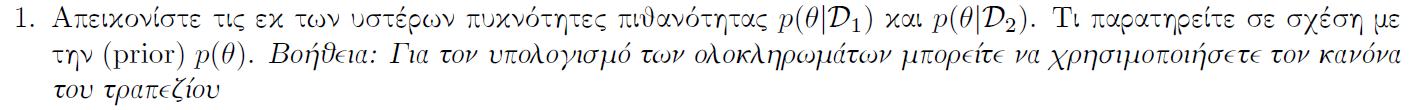

Accordind to **Bayes Theorem**, the a-posteriori probability is given by: **p(θ | D) = p(D | θ)⋅p(θ) / p(D)**
where p(θ) is *the prior*, p(D|θ) is *the likelihood* of the Dataset D and p(D) is *the evidence of marginal likelihood* which is a normalizing constant


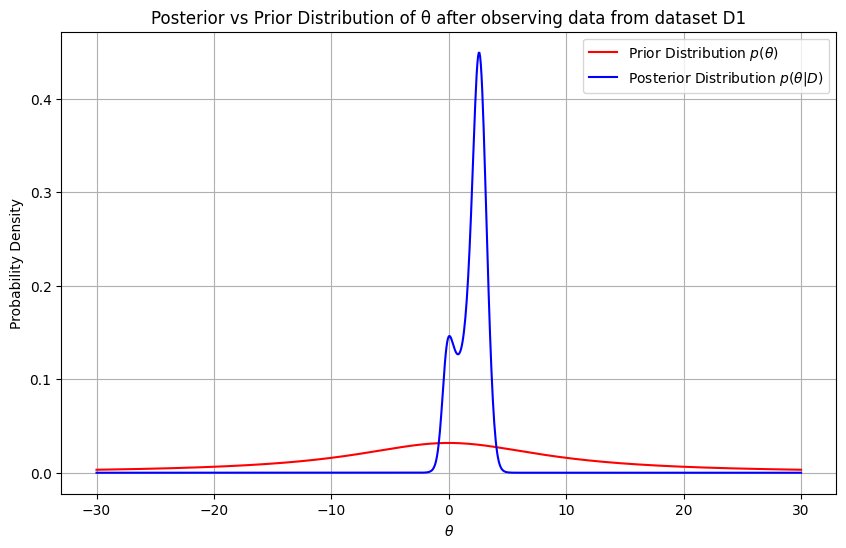

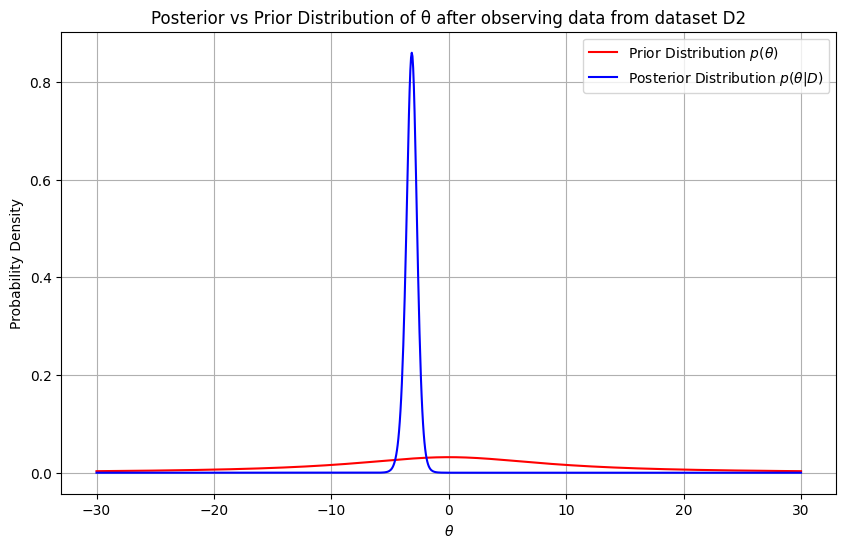

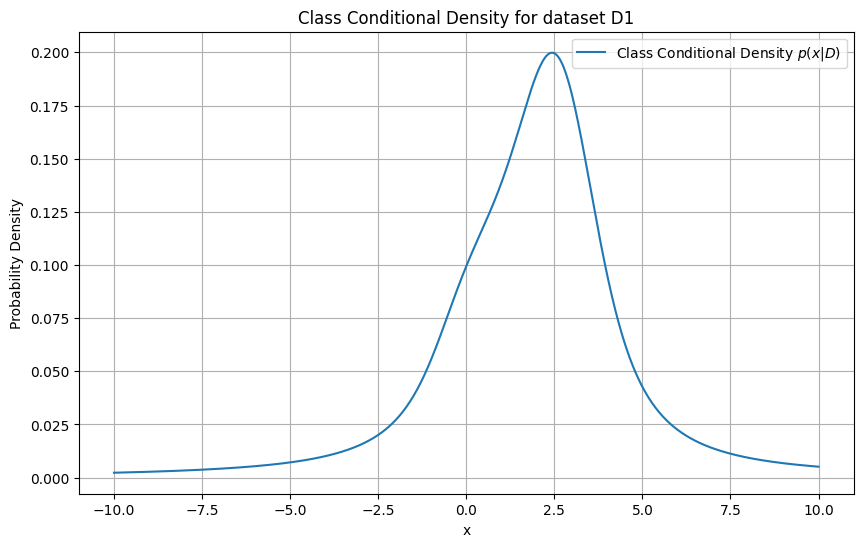

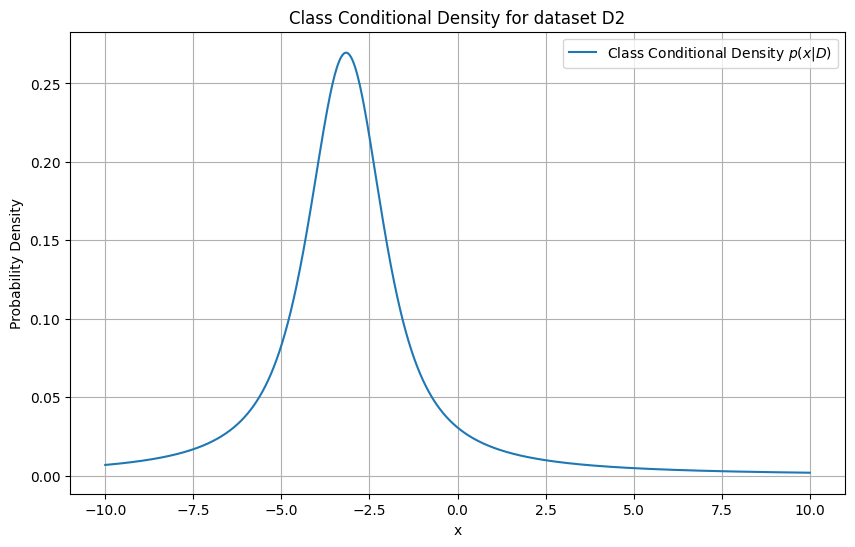

In [ ]:
# Define the datasets D1, D2
# Dataset D1
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
# Dataset D2
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Define the range of theta values for which we will plot the posterior probabilities
theta_range = (-30, 30)
theta_values = np.linspace(theta_range[0], theta_range[1], 1000)

# Define the range of x values for which we will plot the probability density function
x_range = (-10, 10)
x_values = np.linspace(x_range[0], x_range[1], 1000)


# Initialize the classifiers for each dataset
classifier1 = BE_Classifier(theta_values, x_values, D1, 1)
classifier2 = BE_Classifier(theta_values, x_values, D2, 2)

# Fit the models
classifier1.fit()
classifier2.fit()

# After the models have fitted on the datasets, plot the prior vs posterior distributions of theta
classifier1.plot_distributions()
classifier2.plot_distributions()

# Plot the probability density functions
classifier1.plot_class_conditional_density()
classifier2.plot_class_conditional_density()

##Task 2: Implement a predict function to calculate the values of a discrimination function h(x)
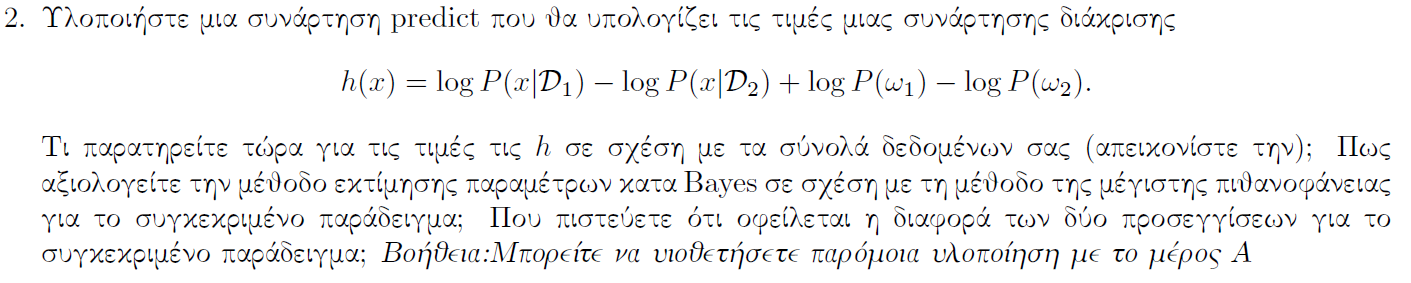

Again, the main idea is to choose ω1 if h(x) > 0, else choose ω2 if h(x) < 0. So we consider the decision boundary h(x) = 0

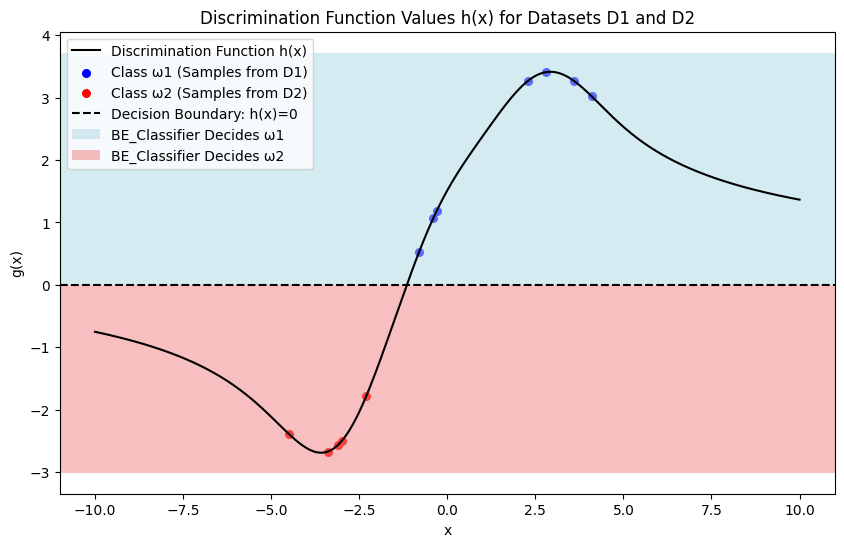

In [ ]:
# Define the a-priori probabilities for each class. These are the percentages of the samples
# of each dataset to the number of all samples for every dataset (frequency definition of probability)
P_w1 = len(D1) / (len(D1) + len(D2)) # a-priori probability of class ω1
P_w2 = len(D2) / (len(D1) + len(D2)) # a-priori probability of class ω2
apriori_probs = np.array([P_w1, P_w2]) # Make an array with the a-prioris to pass to the predict method

# Define a predict function to calculate the values of discrimination function h
def predict(classifier1: BE_Classifier, classifier2: BE_Classifier, apriori_probs, sample):
    log_aprioris = np.log(apriori_probs)
    log_pdf1 = np.log(classifier1.class_conditional_density(sample))
    log_pdf2 = np.log(classifier2.class_conditional_density(sample))
    h_value = log_pdf1 - log_pdf2 + log_aprioris[0] - log_aprioris[1]
    return h_value

# Calculate the h values for x in x_range
h_values = [predict(classifier1, classifier2, apriori_probs, x_value) for x_value in x_values]

# Plot the h function over x_values
plt.figure(figsize=(10, 6))
plt.plot(x_values, h_values, label='Discrimination Function h(x)', color='black')

# Calculate the h values of sample in datasets D1, D2
h_D1 = [predict(classifier1, classifier2, apriori_probs, x_value) for x_value in D1]
h_D2 = [predict(classifier1, classifier2, apriori_probs, x_value) for x_value in D2]

# Visualization of h values of samples in datasets D1, D2
plt.scatter(D1, h_D1, color='blue', label='Class ω1 (Samples from D1)', s=30)
plt.scatter(D2, h_D2, color='red', label='Class ω2 (Samples from D2)', s=30)

# Make a horizontal dashed line to signify the decision boundary
plt.axhline(0, color='black', linestyle='--', label='Decision Boundary: h(x)=0')
# Shade the positive y-region (y > 0) with light blue
plt.axhspan(0, plt.ylim()[1], facecolor='lightblue', alpha=0.5, label='BE_Classifier Decides ω1')

# Shade the negative y-region (y < 0) with light red
plt.axhspan(plt.ylim()[0], 0, facecolor='lightcoral', alpha=0.5, label='BE_Classifier Decides ω2')

plt.title('Discrimination Function Values h(x) for Datasets D1 and D2')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(False)
plt.show()



#Part C: Decision Trees & Random Forests

## Section 1: Decision Trees
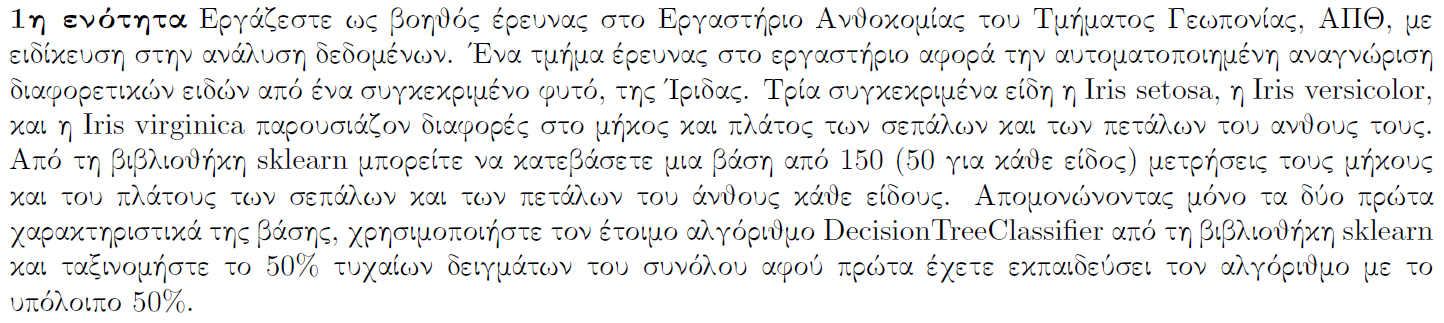

In [ ]:
from sklearn.datasets import load_iris # Import the dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import the decision tree classifier
from sklearn.metrics import accuracy_score # Import the metric evaluator
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Find tree depth that achieves maximum accuracy
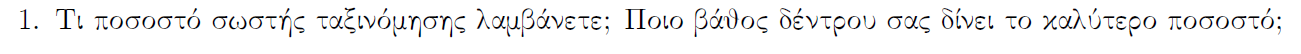

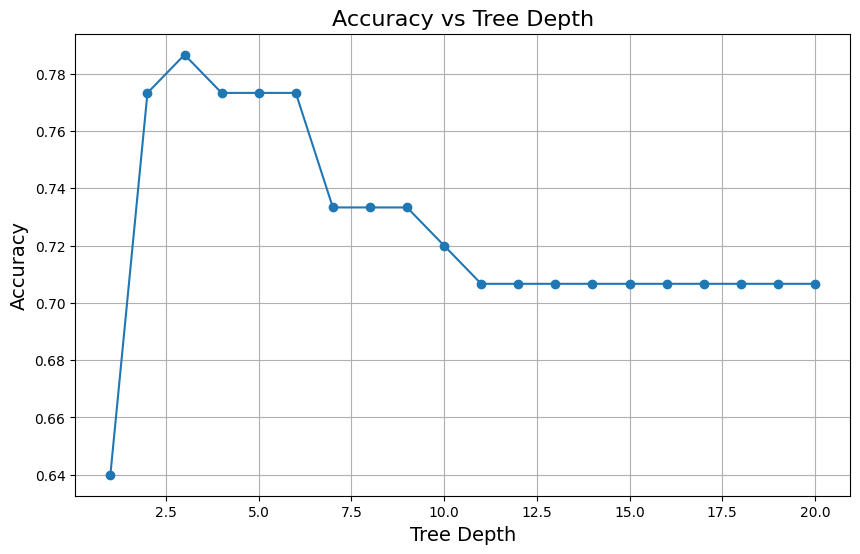

The best tree depth is 3 with an accuracy of 0.787.


In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
# Import only the first two features of the ds
# iris.target are the labels, 0 for IS, 1 for IVe, 2 for IVi
# We will use a specific random state for reproducability
random_state=42
# Split the dataset into 50% training and 50% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)

# The tree depths for which we will train the Decision Tree Classifier
depths = range(1, 21)
# Initialize list to store accuracies
accuracies = []

# Loop through depths from 1 to 20
for depth in depths:
    # Initialize and train the Decision Tree with the current depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy
    accuracies.append(accuracy)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.title("Accuracy vs Tree Depth", fontsize=16)
plt.xlabel("Tree Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.show()

# Find the depth with the best accuracy
best_accuracy = max(accuracies)
best_depth = depths[accuracies.index(best_accuracy)]
print(f"The best tree depth is {best_depth} with an accuracy of {best_accuracy:.3f}.")


###Task 2: Decision Tree Boundaries for optimal tree depth
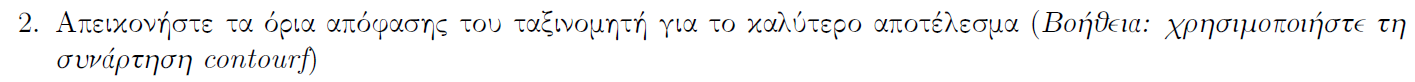

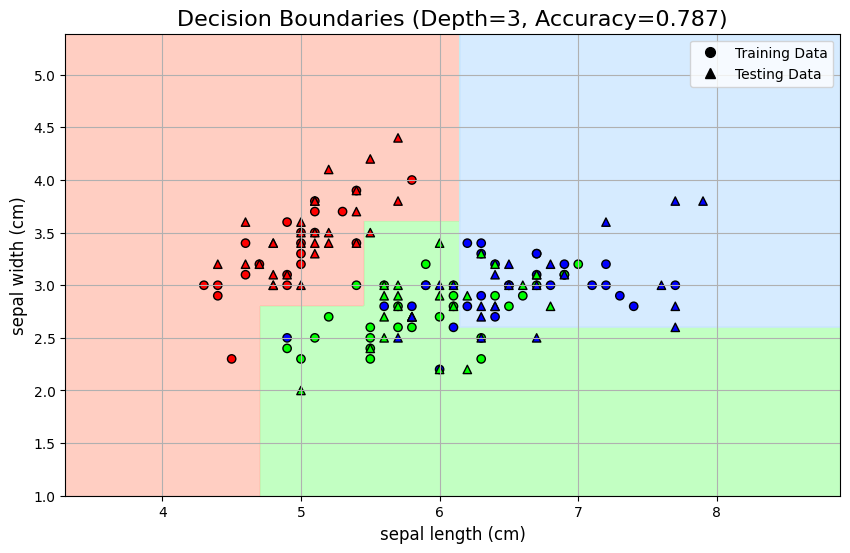

In [ ]:
# Take the classifier with the optimal tree depth
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=random_state)
best_decision_tree.fit(X_train, y_train)

# Create a grid of points to evaluate the model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = best_decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the colors of the decision areas and the scatter points
from matplotlib.colors import ListedColormap
decision_colors = ListedColormap(["#ffc2b3", "#b3ffb3", "#cce6ff"])
scatter_colors = ListedColormap(["#ff0000", "#00ff00", "#0000ff"])

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=decision_colors)

# Plot the samples from training dataset with circles
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=scatter_colors, marker='o', label="Training Data")

# Plot the samples from testing dataset with squares
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=scatter_colors, marker='^', label="Testing Data")

plt.title(f"Decision Boundaries (Depth={best_depth}, Accuracy={best_accuracy:.3f})", fontsize=16)
plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)

# Create custom legend handles with black edges
import matplotlib.lines as mlines
legend_elements = [
    mlines.Line2D([], [], marker='o', color='k', linestyle='None',
                              markersize=7, label='Training Data',
                              markeredgecolor='k'),
    mlines.Line2D([], [], marker='^', color='k', linestyle='None',
                              markersize=7, label='Testing Data',
                              markeredgecolor='k')
]
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

## Section 2: Random Forests
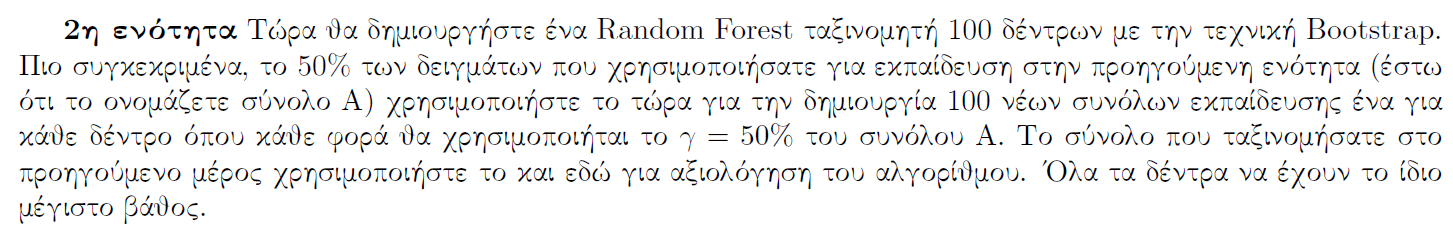

### Task 1: Find tree depth that achieves maximum accuracy
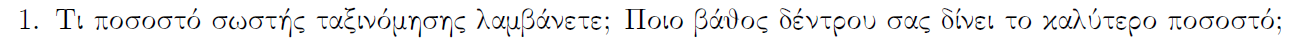

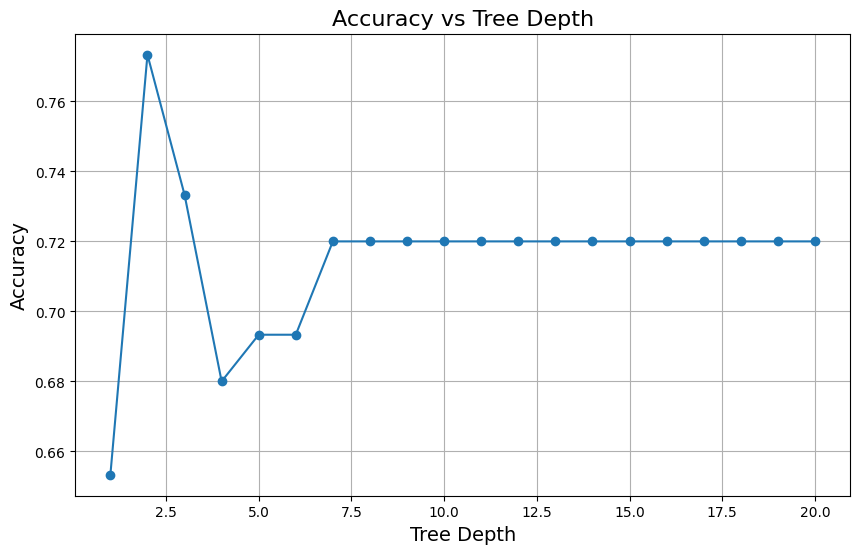

The best tree depth is 2 with an accuracy of 0.773.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Again random_state=42 for reproducability
random_state=42

# Define the dataset A as 50% of the initial training set
X_A, _, y_A, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=random_state)

# The depths we will examine for the trees in random forest
depths = range(1, 21)
# Initialize list to store accuracies
accuracies = []
# Gamma - the percentage of A each tree of the random forest will be trained on
gamma=0.5
# Number of trees in each Random Forest
n_trees = 100

# Loop through depths from 1 to 20
for depth in depths:
    # We want to train a Random Forest using dataset A
    # For each Random Forest of specific depth
    # We will train 100 Decision Trees
    # Each one of those trees will be trained on a dataset which has gamma * A samples
    # Where gamma = 0.5 but we will have a different partition of A in each tree
    # Initialize and train the Decision Tree with the current depth
    # Number of trees in the Random Forest

# For the argument max_samples (gamma) and how it affects the algorithm's performance
#     High values (close to 100%): Trees are trained on nearly all the data, leading to less diversity in the ensemble.
#     Moderate values (e.g., 50%-70%): Can balance diversity and individual tree strength, often improving generalization.
#     Very low values (e.g., <30%): Trees may become too weak, and the ensemble may underfit.

    # Create the Random Forest classifier
    # max_samples=gamma ensures each tree is trained on gamma * A samples
    random_forest = RandomForestClassifier(n_estimators=n_trees, max_samples=gamma, bootstrap=True, max_depth=depth, random_state=random_state)
    # Train the Random Forest on the training data
    random_forest.fit(X_A, y_A)
    # Predict on the test set
    y_pred = random_forest.predict(X_test)
    # Calculate accuracy of the Random Forest
    accuracy = accuracy_score(y_test, y_pred)
    # Store the accuracy of Random Forest for this depth into accuracies[]
    accuracies.append(accuracy)


# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.title("Accuracy vs Tree Depth", fontsize=16)
plt.xlabel("Tree Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)
plt.show()

# Find the depth with the best accuracy
best_accuracy = max(accuracies)
best_depth = depths[accuracies.index(best_accuracy)]
print(f"The best tree depth is {best_depth} with an accuracy of {best_accuracy:.3f}.")


### Task 2: Random Forest Boundaries for optimal tree depth
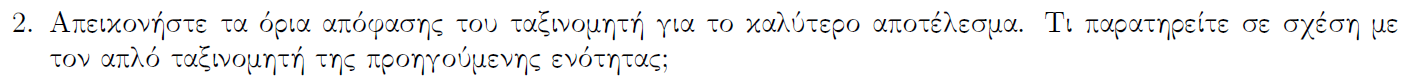

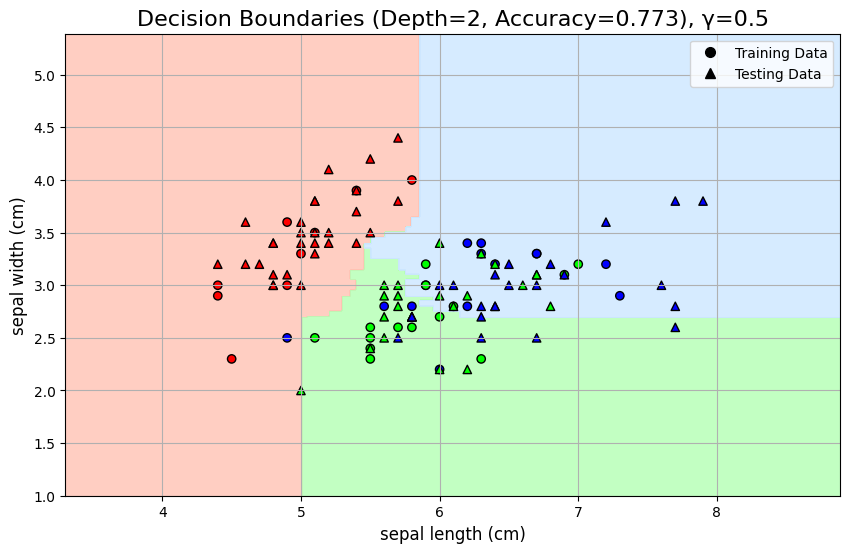

In [ ]:
# Take the random forest that scored the best accuracy and depict its decision boundaries
best_random_forest = RandomForestClassifier(n_estimators=n_trees, max_samples=gamma, bootstrap=True, max_depth=best_depth, random_state=random_state)
best_random_forest.fit(X_A, y_A)

# Create a grid of points to evaluate the model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = best_random_forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define the colors of the decision areas and the scatter points
from matplotlib.colors import ListedColormap
decision_colors = ListedColormap(["#ffc2b3", "#b3ffb3", "#cce6ff"])
scatter_colors = ListedColormap(["#ff0000", "#00ff00", "#0000ff"])

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=decision_colors)

# Plot the samples from training dataset with circles
plt.scatter(X_A[:, 0], X_A[:, 1], c=y_A, edgecolor='k', cmap=scatter_colors, marker='o', label="Training Data")

# Plot the samples from testing dataset with squares
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=scatter_colors, marker='^', label="Testing Data")

plt.title(f"Decision Boundaries (Depth={best_depth}, Accuracy={best_accuracy:.3f}), γ={gamma}", fontsize=16)
plt.xlabel(iris.feature_names[0], fontsize=12)
plt.ylabel(iris.feature_names[1], fontsize=12)

# Create custom legend handles with black edges
import matplotlib.lines as mlines
legend_elements = [
    mlines.Line2D([], [], marker='o', color='k', linestyle='None',
                              markersize=7, label='Training Data',
                              markeredgecolor='k'),
    mlines.Line2D([], [], marker='^', color='k', linestyle='None',
                              markersize=7, label='Testing Data',
                              markeredgecolor='k')
]
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

## Task 3: The effect of parameter γ on accuracy

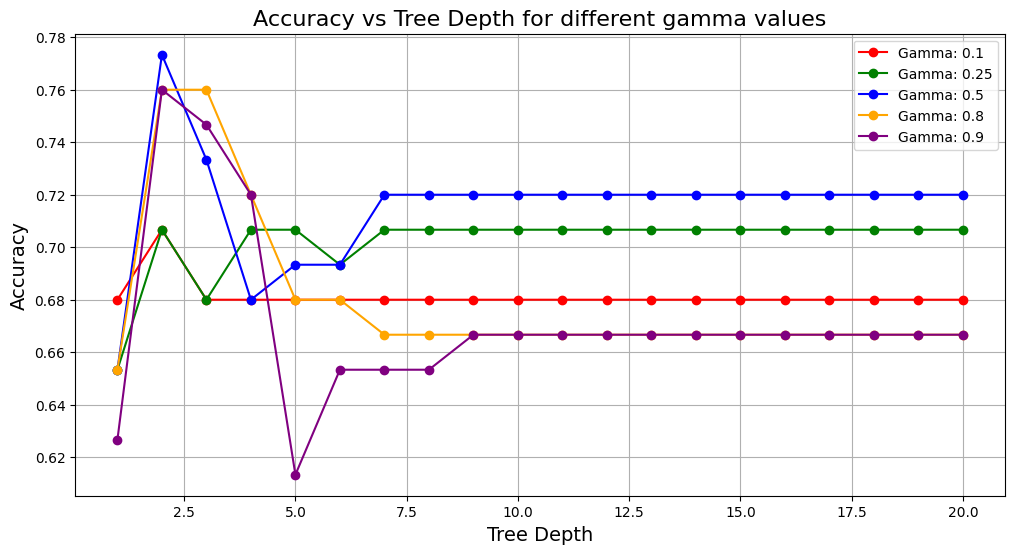

In [ ]:
# The depths we will examine for the trees in random forest
depths = range(1, 21)
# Initialize list to store accuracies
accuracies = []
# Gamma values
gamma_values = [0.1, 0.25, 0.5, 0.8, 0.9]
colors = ['red', 'green', 'blue', 'orange', 'purple']
# Number of trees in each Random Forest
n_trees = 100

plt.figure(figsize=(12, 6))

# Loop for each gamma value
for gamma, color in zip(gamma_values, colors):
    # Reset accuracies
    accuracies = []
    # Loop through depths from 1 to 20
    for depth in depths:
        random_forest = RandomForestClassifier(n_estimators=n_trees, max_samples=gamma, bootstrap=True, max_depth=depth, random_state=random_state)
        # Train the Random Forest on the training data
        random_forest.fit(X_A, y_A)
        # Predict on the test set
        y_pred = random_forest.predict(X_test)
        # Calculate accuracy of the Random Forest
        accuracy = accuracy_score(y_test, y_pred)
        # Store the accuracy of Random Forest for this depth into accuracies[]
        accuracies.append(accuracy)
    plt.plot(depths, accuracies, marker='o', label=f'Gamma: {gamma}', color=color)

plt.title("Accuracy vs Tree Depth for different gamma values", fontsize=16)
plt.xlabel("Tree Depth", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()